<a href="https://colab.research.google.com/github/pvpogorelova/metrics_24_25/blob/main/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_16_Diff_in_Diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
# Создаём DataFrame из CSV-данных, считанных с URL
d = pd.read_csv("/content/data-difference-in-differences.csv")
d

,x_co_owned,x_southern_nj,x_central_nj,x_northeast_philadelphia,x_easton_philadelphia,x_st_wage_before,x_st_wage_after,x_hrs_open_weekday_before,x_hrs_open_weekday_after,y_ft_employment_before,y_ft_employment_after,d_nj,d_pa,x_burgerking,x_kfc,x_roys,x_wendys,x_closed_permanently
0,0,0,0,1,0,NaN,4.30,16.5,16.5,40.50,24.00,0,1,1,0,0,0,0
1,0,0,0,1,0,NaN,4.45,13.0,13.0,13.75,11.50,0,1,0,1,0,0,0
2,1,0,0,1,0,NaN,5.00,10.0,11.0,8.50,10.50,0,1,0,1,0,0,0
3,1,0,0,1,0,5.00,5.25,12.0,12.0,34.00,20.00,0,1,0,0,0,1,0
4,1,0,0,1,0,5.50,4.75,12.0,12.0,24.00,35.50,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,1,0,0,0,0,4.95,5.25,12.0,11.0,9.00,23.75,1,0,0,1,0,0,0
406,1,0,0,0,0,4.75,5.25,11.0,14.0,9.75,17.50,1,0,0,1,0,0,0
407,1,0,0,0,0,4.25,5.05,19.0,18.0,24.50,20.50,1,0,0,0,1,0,0
408,0,0,0,0,0,4.75,5.05,12.5,12.5,14.00,20.50,1,0,0,0,0,1,0


In [ ]:
# Почасовая зарплата в Нью-Джерси до повышения
x_st_wage_before_nj = d[d['d_nj'] == 1]['x_st_wage_before']

# Почасовая зарплата в Пенсильвании до повышения
x_st_wage_before_pa = d[d['d_pa'] == 1]['x_st_wage_before']

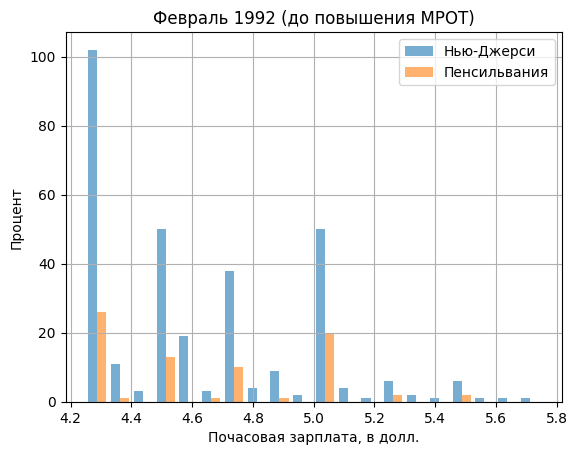

In [ ]:
plt.figure()
plt.hist([x_st_wage_before_nj, x_st_wage_before_pa], bins=20, alpha=0.6, label=["Нью-Джерси", "Пенсильвания"])
plt.legend()
plt.title("Февраль 1992 (до повышения МРОТ)")
plt.xlabel("Почасовая зарплата, в долл.")
plt.ylabel("Процент")
plt.grid(True)
plt.show()

In [ ]:
# Почасовая зарплата в Нью-Джерси после повышения
x_st_wage_after_nj = d[d['d_nj'] == 1]['x_st_wage_after']

# Почасовая зарплата в Пенсильвании после повышения
x_st_wage_after_pa = d[d['d_pa'] == 1]['x_st_wage_after']

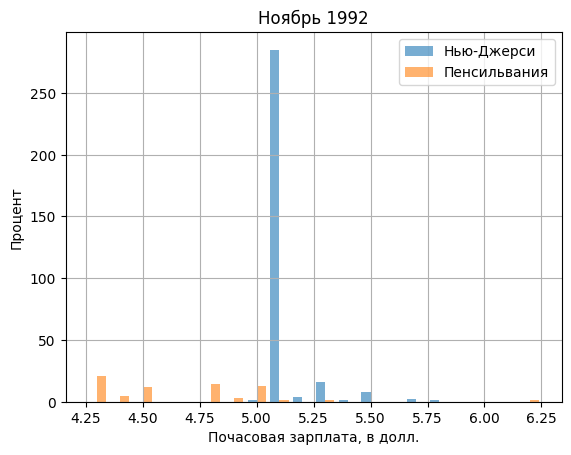

In [ ]:
plt.figure()
plt.hist([x_st_wage_after_nj, x_st_wage_after_pa], bins=20, alpha=0.6, label=["Нью-Джерси", "Пенсильвания"])
plt.legend()
plt.title("Ноябрь 1992")
plt.xlabel("Почасовая зарплата, в долл.")
plt.ylabel("Процент")
plt.grid(True)
plt.show()

In [ ]:
# Рассчитаем эффект воздействия с помощью DID
table_res = d.groupby('d_nj').agg({
    'y_ft_employment_before': [
        'mean', 'var', 'count'],
    'y_ft_employment_after': [
        'mean', 'var', 'count']
})
table_res

y_ft_employment_before                   y_ft_employment_after  \
                       mean         var count                  mean   
d_nj                                                                  
0                 23.331169  140.571450    77             21.165584   
1                 20.439408   82.923591   321             21.027429   

                       
            var count  
d_nj                   
0     68.504293    77  
1     86.360291   319

In [ ]:
table_res['se.mean.before'] = table_res['y_ft_employment_before']['var'].map(lambda x: x / table_res['y_ft_employment_before']['count']**0.5)
table_res['se.mean.after'] = table_res['y_ft_employment_after']['var'].map(lambda x: x / table_res['y_ft_employment_after']['count']**0.5)
table_res

y_ft_employment_before                   y_ft_employment_after  \
                       mean         var count                  mean   
d_nj                                                                  
0                 23.331169  140.571450    77             21.165584   
1                 20.439408   82.923591   321             21.027429   

                                                          se.mean.before  \
            var count                                                      
d_nj                                                                       
0     68.504293    77  d_nj
0    16.019603
1     7.845933
Name: count...   
1     86.360291   319  d_nj
0    9.450020
1    4.628343
Name: count, ...   

                                          se.mean.after  
                                                         
d_nj                                                     
0     d_nj
0    7.806789
1    3.835504
Name: count, ...  
1     d_nj
0    9.841669
1    4.835248
Name: count, ...

In [ ]:
# Рассчитаем эффект воздействия
delta = (table_res.loc[1, 'y_ft_employment_after']['mean'] - table_res.loc[1, 'y_ft_employment_before']['mean']) \
- (table_res.loc[0, 'y_ft_employment_after']['mean'] - table_res.loc[0, 'y_ft_employment_before']['mean'])

print(delta)

2.753605782980582


In [ ]:
d['diff'] = d['y_ft_employment_after']-d['y_ft_employment_before']
reg = smf.ols("diff ~ d_nj", d).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.675
Date:                Thu, 30 Jan 2025   Prob (F-statistic):             0.0177
Time:                        19:58:03   Log-Likelihood:                -1386.2
No. Observations:                 384   AIC:                             2776.
Df Residuals:                     382   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2833      1.036     -2.205      0.0